### SIFT:Scale-invariant feature transformScale-invariant feature transform 

**SIFT** les descripteurs fournissent une représentation alternative pour les régions d'image. Ils sont très utiles pour faire correspondre les images. Les détecteurs de coin simples fonctionnent bien lorsque les images à faire correspondre sont de nature similaire (en ce qui concerne l'échelle, l'orientation, etc.). Mais s'ils ont des échelles et des rotations différentes, les descripteurs SIFT doivent être utilisés pour les faire correspondre. SIFT est non seulement invariant à l'échelle, mais il obtient toujours de bons résultats lorsque la rotation, l'éclairage et les points de vue des images changent également.

### opencv et opencv-contrib

Afin de pouvoir utiliser les fonctions SIFT avec python-opencv, 
vous devez d'abord installer opencv-contrib en suivant les instructions de ce lien : 
https://pypi.org/project/opencv-contrib-python/.

### Exercice 

Détecter les points clés SIFT et les dessine à l'aide d'entrer de l'image **cloudy10.jpg**.
Vous allez d'abord construire un objet SIFT puis utiliser la méthode **detect()**
pour calculer les points clés d'une image. Chaque point clé est 
une caractéristique spéciale et possède plusieurs attributs. Par exemple, 
ses coordonnées (x, y), son angle (orientation), sa réponse (force des points clés),
la taille du voisinage significatif, ...

Vous utilisez la fonction **drawKeyPoints()** de **cv2** pour dessiner les petits cercles autour des points clés détectés. Si le **cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS** est appliqué à la fonction, elle dessinera un cercle avec la taille d'un point clé, ainsi que son orientation. Afin de calculer les points clés et le descripteur ensemble, vous allez utiliser la fonction **detectAndCompute()** .

### Création de descripteur d'image

* Cette image contient 319 descripteurs
* Chaque descripteur est un vecteur de longueur 128

**Etapes**
1. passage en gris 
2. equalisation en histogramme
3. création d'une liste de descripteurs d'image 
4. dessiner les points clés de l'image 
5. afficher les descripteurs

In [2]:
from os import getcwd
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import sys
sys.path.append("C:\\Users\\User\\WORK\\workspace-ia\\PERSO\\")
from ara_commons import ara_picture_function as ara_pict
from ara_commons.ara_file import get_dir_files

In [3]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
force_reloading = True

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
file_path

'c:\\Users\\User\\WORK\\workspace-ia\\PROJETS\\vae_weather_picture\\'

In [29]:
img_cloudy_path = file_path + "cloudy10.jpg"
img_zack_path = file_path + "20210925_190551.jpg"

<div style="display: flex; background-color: green;" >

## 1.1. Lecture de l'image en Gris
</div>


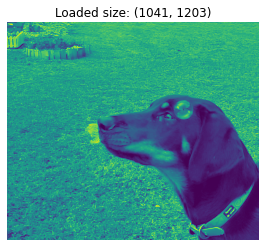

In [31]:
img_gray = cv2.imread(img_zack_path, 0)
plt.imshow(img_gray)
plt.title(f'Loaded size: {img_gray.shape}') 
plt.axis('off')
plt.show()

In [177]:
img_gray.shape

(1041, 1203)

In [ ]:
img_gray.format

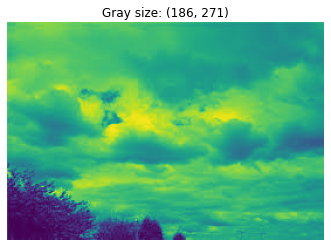

In [32]:
img_cloudy_gray = cv2.imread(file_path + "cloudy10.jpg", 0)
plt.imshow(img_cloudy_gray)
plt.title(f'Gray size: {img_cloudy_gray.shape}') 
plt.axis('off')
plt.show()

<div style="display: flex; background-color: green;" >

## 1.3. Resize
</div>


Original size: (1041, 1203)


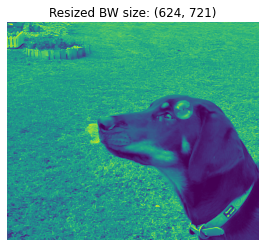

In [36]:
# resize image
resized = ara_pict.resize_picture(img_gray, scale_percent=60)
print("Original size:", img_gray.shape)
plt.imshow(resized)
plt.title(f'Resized BW size: {resized.shape}') 
plt.axis('off')
plt.show()

<div style="display: flex; background-color: green;" >

## 1.4. Equalisation en histogramme
</div>


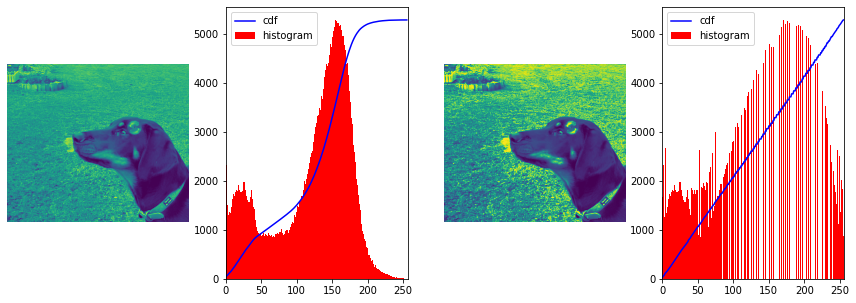

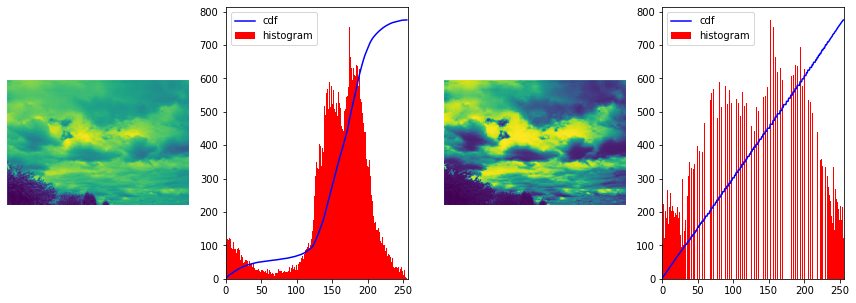

In [120]:
sack_equalize = ara_pict.show_histogramme(img_param=[resized], equalize=True)
cloudy_equalize = ara_pict.show_histogramme(img_cloudy_gray, equalize=True)

<div style="display: flex; background-color: green;" >

## 1.5. création d'une liste de descripteurs d'image
</div>


<div style="display: flex; background-color: green;" >

## 1.6. dessiner les points clés de l'image 
</div>


Descripteurs :  (300, 128)


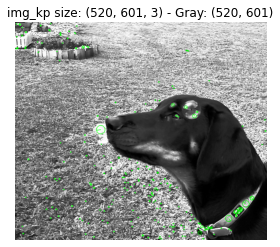

Descripteurs :  (300, 128)


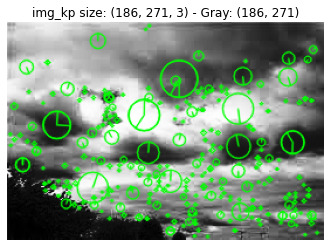

In [171]:
zack_kp, zack_des, zack_img_kp = ara_pict.transform_kp(img_zack_path, scale_percent=50)
cloudy_kp, cloudy_des, cloudy_img_kp = ara_pict.transform_kp(img_cloudy_path)

In [179]:
type(zack_kp)

tuple

In [180]:
zack_kp

(<KeyPoint 00000161F2352F30>,
 <KeyPoint 00000161F2A91F90>,
 <KeyPoint 00000161F2C57510>,
 <KeyPoint 00000161F2FCC8D0>,
 <KeyPoint 00000161F27883C0>,
 <KeyPoint 00000161F2788C60>,
 <KeyPoint 00000161F2788930>,
 <KeyPoint 00000161F27887E0>,
 <KeyPoint 00000161F2788420>,
 <KeyPoint 00000161F2788630>,
 <KeyPoint 0000016180014F60>,
 <KeyPoint 00000161F3142480>,
 <KeyPoint 00000161F279EEA0>,
 <KeyPoint 00000161F279ED50>,
 <KeyPoint 0000016180680030>,
 <KeyPoint 000001618067E2D0>,
 <KeyPoint 000001618067E300>,
 <KeyPoint 000001618067E330>,
 <KeyPoint 000001618067E360>,
 <KeyPoint 000001618067E390>,
 <KeyPoint 000001618067E3C0>,
 <KeyPoint 000001618067E3F0>,
 <KeyPoint 000001618067E420>,
 <KeyPoint 000001618067E450>,
 <KeyPoint 000001618067E480>,
 <KeyPoint 000001618067E4B0>,
 <KeyPoint 000001618067E4E0>,
 <KeyPoint 000001618067E510>,
 <KeyPoint 000001618067E540>,
 <KeyPoint 000001618067E570>,
 <KeyPoint 000001618067E5A0>,
 <KeyPoint 000001618067E5D0>,
 <KeyPoint 000001618067E660>,
 <KeyPoint

In [ ]:
def define_img_point_color(img_src_path, resize_scale_percent=None, display_cv2=False, verbose=0):
    #reading the image using imread() function from cv2 module and converting it into gray image
    readimage = cv2.imread(img_src_path)
    if resize_scale_percent is not None:
        readimage = ara_pict.resize_picture(readimage, scale_percent=resize_scale_percent, verbose=verbose)
        
    grayimage = cv2.cvtColor(readimage, cv2.COLOR_BGR2GRAY)
    #creating a sift object and using detectandcompute() function to detect the keypoints and descriptor from the image
    siftobject = cv2.xfeatures2d.SIFT_create()
    keypoint, descriptor = siftobject.detectAndCompute(grayimage, None)
    #drawing the keypoints and orientation of the keypoints in the image and then displaying the image as the output on the screen
    keypointimage = cv2.drawKeypoints(readimage, keypoint, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    if display_cv2:
        cv2.imshow('SIFT', keypointimage)
        cv2.waitKey()
    else:
        plt.imshow(keypointimage)
        plt.title(f'img_kp size: {keypointimage.shape} - Gray: {grayimage.shape}') 
        plt.axis('off')
        plt.show()
    return keypoint, descriptor

<div style="display: flex; background-color: green;" >

## 1.7. afficher les descripteurs
</div>


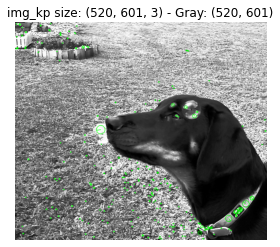

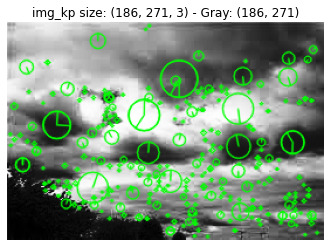

((<KeyPoint 00000161F2E4A450>,
  <KeyPoint 0000016181073FC0>,
  <KeyPoint 0000016181073180>,
  <KeyPoint 000001618108B240>,
  <KeyPoint 00000161810B4210>,
  <KeyPoint 00000161810B4390>,
  <KeyPoint 00000161F279A5D0>,
  <KeyPoint 00000161F279A9C0>,
  <KeyPoint 00000161F279A990>,
  <KeyPoint 00000161F279AA50>,
  <KeyPoint 00000161F279AB10>,
  <KeyPoint 00000161F279A630>,
  <KeyPoint 00000161F279AF90>,
  <KeyPoint 00000161F279A8A0>,
  <KeyPoint 00000161F279AC00>,
  <KeyPoint 00000161F279A5A0>,
  <KeyPoint 00000161F279ABD0>,
  <KeyPoint 00000161F279A780>,
  <KeyPoint 00000161F279AC90>,
  <KeyPoint 00000161F279A750>,
  <KeyPoint 00000161F279A960>,
  <KeyPoint 00000161F279AA80>,
  <KeyPoint 00000161F279A420>,
  <KeyPoint 00000161F279ACC0>,
  <KeyPoint 00000161F279AA20>,
  <KeyPoint 00000161F279AAB0>,
  <KeyPoint 00000161F279A3C0>,
  <KeyPoint 00000161F279A8D0>,
  <KeyPoint 00000161F279A4B0>,
  <KeyPoint 00000161F279A7E0>,
  <KeyPoint 00000161F279A570>,
  <KeyPoint 00000161F279A210>,
  <KeyPo

In [175]:
ara_pict.define_img_point(img_zack_path, resize_scale_percent=50)
ara_pict.define_img_point(img_cloudy_path)

In [163]:
def test(img_path, show=True, resize_scale_percent=None):
    img = cv2.imread(img_path)
    if resize_scale_percent is not None:
        img = ara_pict.resize_picture(img, scale_percent=resize_scale_percent, verbose=verbose)
       
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # gray = cv2.imread(img, 0)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    if show:
        plt.imshow(gray)
        plt.title(f'img size: {img.shape}, Gray : {gray.shape}') 
        plt.axis('off')
        plt.show()

    return gray

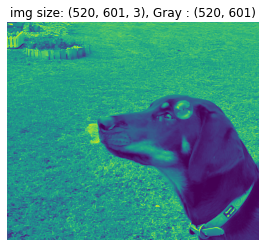

array([[ 14,  17,  11, ..., 178, 173, 164],
       [ 90,  93,  91, ..., 138, 144, 140],
       [138, 125, 122, ..., 161, 158, 168],
       ...,
       [ 84,  97,  94, ...,  26,  29,  28],
       [ 71, 103, 107, ...,  28,  27,  27],
       [ 71, 107, 120, ...,  32,  28,  24]], dtype=uint8)

In [164]:
test(img_path=img_zack_path, show=True, resize_scale_percent=50)

In [ ]:
def feature_similarity(image_1,image_2,threshold=0.7):
    """SIFT Feature based image similarity
    
    @param image_1: np.array(the first input image)
    @param image_2: np.array(the second input image)
    @param threshold: float(the lower's threshold)
    @return similarity: float(range from [0,1], the bigger the more similar)
    @return good_match_num； int(the number of good match point pairs)
    """    
    kp1, des1 = _sift_extract(image_1)
    kp2, des2 = _sift_extract(image_2)
    if len(kp1) <= len(kp2):
        num = len(kp1)
    else:
        num = len(kp2)
    if num <= 0:
        similarity, good_match_num = 0.0, 0.0
    else:
        good_match, default = _searchAndmatch(des1, des2, threshold)
        good_match_num = float(len(good_match))
        similarity = good_match_num/num
    return similarity, good_match_num 

In [ ]:
def init_detector(self):
    """Init keypoint detector object."""
    # BRIEF is a feature descriptor, recommand CenSurE as a fast detector:
    if check_cv_version_is_new():
        # OpenCV3/4, sift is in contrib module, you need to compile it seperately.
        try:
            self.detector = cv2.xfeatures2d.SIFT_create(edgeThreshold=10)
        except:
            import traceback
            traceback.print_exc()
            raise NoModuleError("There is no %s module in your OpenCV environment, need contribmodule!" % self.METHOD_NAME)
    else:
        # OpenCV2.x
        self.detector = cv2.SIFT(edgeThreshold=10)

    # # create FlnnMatcher object:
    self.matcher = cv2.FlannBasedMatcher({'algorithm': self.FLANN_INDEX_KDTREE, 'trees': 5}, dict(checks=50))

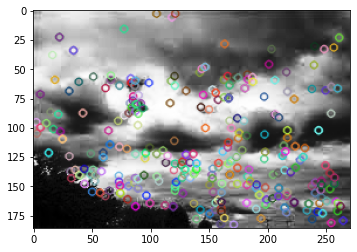

Descripteurs :  (319, 128)

[[ 21.   2.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...  21.  13.  12.]
 [  1.   1.   0. ...  13.   1.   3.]
 ...
 [ 46.  22.   0. ...   0.   0.   0.]
 [ 26. 140.   5. ...   1.   0.   0.]
 [ 49.  33.   4. ...  59.   2.   1.]]


<div style="display: flex; background-color: Blue; padding: 15px;" >

## ANNEXES 
</div>

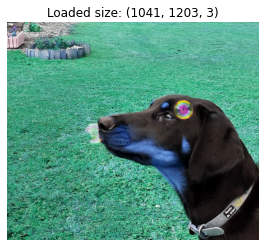

In [ ]:
img_scr = cv2.imread(img_zack_path, cv2.IMREAD_UNCHANGED)
plt.imshow(img_scr)
plt.title(f'Loaded size: {img_scr.shape}') 
plt.axis('off')
plt.show()

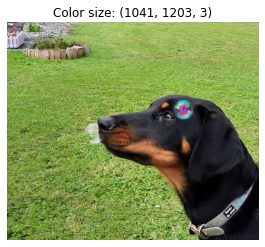

In [ ]:
color_img = cv2.imread(file_path + "20210925_190551.jpg", cv2.COLOR_BGR2RGB)
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
plt.imshow(color_img)
plt.title(f'Color size: {color_img.shape}') 
plt.axis('off')
plt.show()

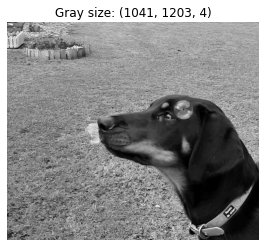

In [ ]:
img_gray = cv2.imread(file_path + "20210925_190551.jpg", cv2.IMREAD_GRAYSCALE)
img_gray = cv2.cvtColor(img_gray, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.title(f'Gray size: {img_gray.shape}') 
plt.axis('off')
plt.show()